In [2]:
import pandas as pd

Lets check is there is some reference data which is more toxic then the translation

In [3]:
data_path = '../data/raw/filtered.tsv'

filtered_dataset = pd.read_csv(data_path, sep='\t')
filtered_dataset.rename(columns={filtered_dataset.columns[0]: "id"}, inplace=True)

filtered_dataset.loc[filtered_dataset['ref_tox'] < filtered_dataset["trn_tox"]]

,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...,...
577764,577764,"Carry on, Chief.","execute him, Chief.",0.701188,0.150000,0.000092,0.998043
577765,577765,"Oh, what a tongue that woman's got, but she's ...","the woman has a sharp tongue, but she's nice.",0.794363,0.220339,0.210133,0.865461
577766,577766,Tell the doctor I'm dropping a deuce.,tell the doctor I'm going to throw the poo.,0.646018,0.136364,0.000456,0.874277
577772,577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143


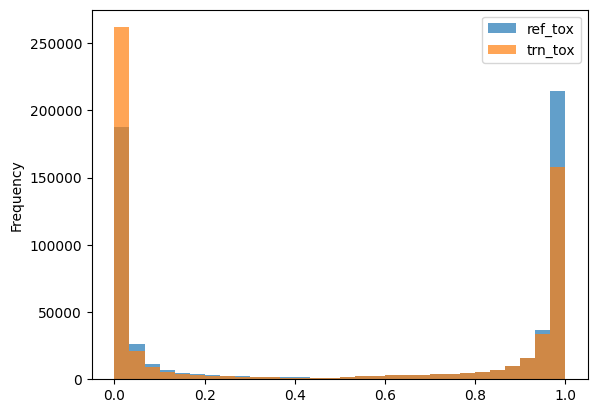

In [4]:
toxicity = filtered_dataset[['ref_tox', 'trn_tox']]
ax = toxicity.plot.hist(bins=30, alpha=0.7)


258635 samples where the reference is more polite!
Well, everything may happen when the dataset is created by humans. But we train a NLP model, so let's fix this bug <s> of leather bags</s> 

In [5]:
condition = filtered_dataset["ref_tox"] < filtered_dataset["trn_tox"]

filtered_dataset.loc[condition, ['reference', 'translation']] = (
    filtered_dataset.loc[condition, ['translation', 'reference']].values)

filtered_dataset.loc[condition, ['ref_tox', 'trn_tox']] = (
    filtered_dataset.loc[condition, ['trn_tox', 'ref_tox']].values)


sorted_df = filtered_dataset.sort_values(by=['ref_tox'], ascending=False)
sorted_df.to_csv('filtered.csv')
sorted_df.head()

,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
84835,84835,"someone for sure, but not these idiots.","Somebody does, but not these mooks.",0.630595,0.100000,0.999730,0.003280
455358,455358,that's the last time we played poker with some...,That is the last time I play poker with some h...,0.698023,0.073171,0.999726,0.076075
133403,133403,because your idiot husband couldn't just wave ...,Because your bozo husband couldn't just wave m...,0.824337,0.052632,0.999724,0.013691
551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599
265344,265344,"that's why I sent those idiots to watch you. """,That's why I sent those human turnips out to w...,0.680794,0.175439,0.999724,0.007180


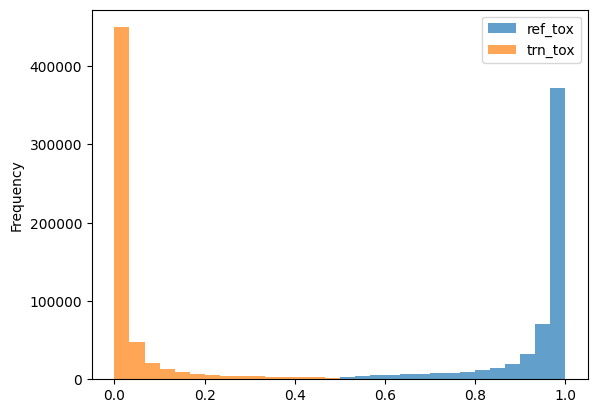

In [6]:
toxicity = sorted_df[['ref_tox', 'trn_tox']]
ax = toxicity.plot.hist(bins=30, alpha=0.7)

For future work I make a new dataset with masked bad words. 
The dataset can be used for masked language modeling with BERT or T5

In [1]:
dictionary_path = '../data/external/Toxic words dictionary.txt'

toxic_words_list = []
with open(dictionary_path, 'rb') as file:
    toxic_words_list = file.read().decode(errors='ignore').splitlines()
len(toxic_words_list)

1929

In [14]:
toxic_mask = '[MASK]'

import re

toxic_words_list_escaped = [re.escape(word) for word in toxic_words_list]

pattern = r'\b(' + '|'.join(toxic_words_list_escaped) + r')\b'

# for bad_word in tqdm(toxic_words_list_with_capitalize):
sorted_df['reference'] = sorted_df['reference'].str.replace(pattern, toxic_mask,flags=re.IGNORECASE, case=True, regex=True)

In [15]:
sorted_df.to_csv('filtered_and_masked_with_regex.csv')

In [16]:
sorted_df

,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599
101676,101676,You have to send those [MASK] back in.,you have to get those guys back there.,0.622852,0.000000,0.999723,0.000115
258368,258368,Salina could be with that [MASK] cop.,Salina could be with the cop.,0.774944,0.210526,0.999723,0.000500
318050,318050,And don't let those [MASK] in radiology hold y...,don't let them fool you in radiology.,0.711188,0.283019,0.999723,0.000874
70934,70934,My [MASK] friend here brought marijuana... - o...,my friend here took a marijuana...,0.715508,0.396552,0.999722,0.000161
...,...,...,...,...,...,...,...
516956,516956,"but after hearing the talk of Gailet, he decid...",But after listening to Gailet he decided he ha...,0.718270,0.125984,0.000034,0.989160
9637,9637,"so if he wants to say ""table..."" he can either...","So if he wants to say ""table,"" he could say ""l...",0.841094,0.064103,0.000034,0.973828
497217,497217,bill thought we were ready to present it befor...,Bill thought we were ready to present to the f...,0.668596,0.288660,0.000034,0.986688
358271,358271,"and the best part is, even though it wasn't al...","And the best thing is, even if they weren't wa...",0.617393,0.390244,0.000033,0.993636
